Entrega: La entrega de este examen se realizará a traves del git hub, en directorio https://github.com/hernansalinas/Metodos_Computacionales_taller/tree/main/Quiz/Entregas

El nombre del notebook deberá ser:

Apellido_Nombre_UltimosCuatroDigitosDelDocumento.ipynb

# Paracaidista en un atmosfera no uniforme.

En una atmósfera isotérmica, la variación de la presión en función de la altitud está dada por la ley de Laplace.

\begin{equation}
P=P_0 e^{-\frac{Mgy}{kT}}
\end{equation}


- $P_0=1atm$ es la presión de la atmósfera a nivel del mar
- M es el peso molecular del aire $28.8 g/mol=0.0288 kg/mol$
- g es la aceleración de la gravedad
- $k=1.3805·10^{-23}$ J/K es la constante de Boltzmann
- $T$ es la temperatura de la atmósfera en kelvin
- $NA=6.0225\times 10^23$ es el número de Avogadro, número de moléculas que caben en un mol.

Suponiendo que el aire se comporta como un gas ideal, su densidad varía con la altura de la misma forma que la presión, $\rho=\rho_0 exp(-y/\lambda)$. La densidad del aire al nivel del mar es $\rho_0=1.29 kg/m^3$ y la constante $\lambda=7482.2 m$


Las fuerzas que actuan sobre el paracaidista son:  El peso y la fuerza de fricción $f=\frac{1}{2}\rho A \delta v^2$, donde $\rho$ es la densidad que depende de la altura, A es el area de seccion trasnversal expuesta al aire  y $\delta $ es coeficiente de rozamiento. La Ecuacion diferencial de movimiento viene dada por:

\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - mg + \frac{A\delta}{2m} \rho v^2 
\end{equation}


\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - mg + k_0v^2 exp(-y/\lambda)
\end{equation}

donde $k_0=\frac{\rho_0A\delta}{2}$, siendo $\rho_0$ la densidad al nivel del mar.

Para la situación descrita, su tarea será elaborar un notebook de jupyter para resolver lo siguente:

1.  Elaborar una gráfica de la densidad como función de la altura.
2. Diseñar un programa que resuelva  la ecuación diferencial que describe el movimiento del paracaidista, para los siguientes parámetros: 

- $m=60kg$, $A=0.3m^2$, $h=30km$.
- $m=60kg$, $A=0.3m^2$, $h=40km$.
- $m=60kg$, $A=0.3m^2$, $h=50km$.
- $m=60kg$, $A=0.3m^2$, $h=60km$.
- $m=60kg$, $A=0.3m^2$, $h=70km$.

3. Con la solucion de la ecuacion diferencial, elaborar una gráfica de. 
- la posición como función del tiempo.
- La velocidad como función del tiempo.
- La velocidad como función de la posición 

4. Determine numéricamente y analiticamente el valor de la velocidad maxima para las diferentes altura Compara su resultado con:

http://www.sc.ehu.es/sbweb/fisica3/fluidos/paracaidas/paracaidas_1.html



5. Realice un grafico de la velocidad maxima como función de la altura de caida.



Reto:

El modelo puede ser mejorado si se tiene presente que la aceleración de la gravedad varia según la altura.

\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - \frac{GM}{(R+y)^2} + \frac{A\delta}{2m} \rho v^2 
\end{equation}

donde $G=6.67\times 10^{-11} \mathrm{Nm^2/kg}$, $M=5.98\times 10 ^{24} \mathrm{kg}$ y el radio de la Tierra es de $R=6.371\mathrm{km}$


Solucione la ecuación diferencial para este caso.





# Solución

In [212]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd

In [213]:
p0=1.29 #kg/m^3
lamda=7482.2 #m

def densidad(p0,y,lamda):
    return p0*np.exp(-y/lamda)

In [214]:
densidad(p0,y,lamda)

array([[0.02340341, 1.29      ],
       [0.02340342, 1.29005069],
       [0.02340346, 1.29010139],
       ...,
       [1.46045438, 1.29781352],
       [1.460719  , 1.2978128 ],
       [1.46098364, 1.29781208]])


\begin{equation}
\frac{dv}{dt} = - mg + k_0v^2 exp(-y/\lambda)
\end{equation}


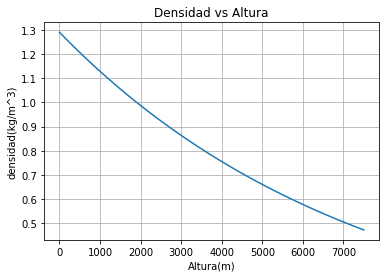

In [274]:
y=np.linspace(0,7500)
plt.plot(y,densidad(p0,y,lamda))
plt.title('Densidad vs Altura')
plt.xlabel('Altura(m)')
plt.ylabel('densidad(kg/m^3)')
plt.grid()

\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - mg + k_0v^2 exp(-y/\lambda)
\end{equation}

donde $k_0=\frac{\rho_0A\delta}{2}$, donde $\rho_0$ es la densidad al nivel del mar.

In [216]:
def no_uniforme(y, t, params): ## funcion del Paracaidista en un atmosfera no uniforme.
  m = params[0]
  g = params[1]
  k0= params[2]

    
 
  dydt =  y[1]
  dvdt =  -g + (k0*((y[1])**2)*(np.exp(-y[0]/lam)))/m
 
  return [dydt, dvdt]

In [217]:
no_uniforme(y,t,params)

[153.0612244897959, 90.93927530195752]

In [218]:
###................................................................Condiciones iniciales
y_0 = np.array([30000,40000,50000,60000,70000]) #..................posicion inicial
v_0 = -1E-10    #velocidad inicial

y0 = np.array([y_0[0], v_0])  #....................................Lista de condiciones iniciales
t = np.linspace(0, 300,10000) #....................................tiempo de integracion
#odeint()

In [219]:
p0=1.29 #kg/m^3
A=0.6 #m^2
delt=0.8
m=72 # kg
g = 9.8  #m/s^2
k0=(p0*A*delt/2)
params = [m, g,k0]
y = odeint(no_uniforme, y0, t, args=(params, ) )

In [220]:
y01 = np.array([y_0[1], v_0])
y1=odeint(no_uniforme, y01, t, args=(params, ) )

y02 = np.array([y_0[2], v_0])
y2=odeint(no_uniforme, y02, t, args=(params, ) )

y03 = np.array([y_0[3], v_0])
y3=odeint(no_uniforme, y03, t, args=(params, ) )

y04 = np.array([y_0[4], v_0])
y4=odeint(no_uniforme, y04, t, args=(params, ) )

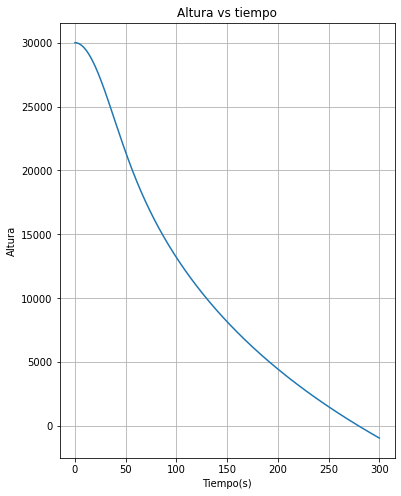

In [221]:
y_1 = np.ones(len(y[:,0]))-y[:,0] 
y_2 = -y[:,1] 

fig1 = plt.figure(figsize = (6,8))
plt.subplot()
plt.plot(t,-y_1)
plt.title('Altura vs tiempo')
plt.xlabel('Tiempo(s)')
plt.ylabel('Altura')
plt.grid()
plt.show()

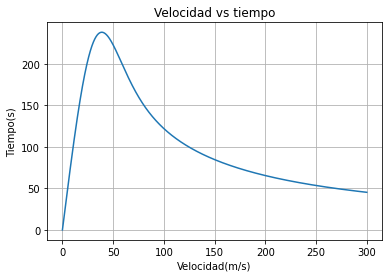

In [272]:
plt.plot(t,y_2)
plt.grid()
plt.title('Velocidad vs tiempo')
plt.xlabel('Velocidad(m/s)')
plt.ylabel('Tiempo(s)')
plt.show()

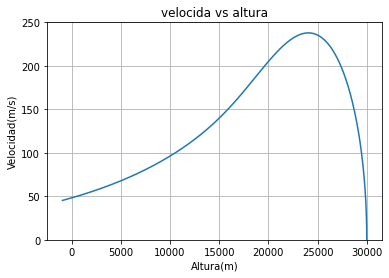

In [271]:
plt.plot(y[:,0],-y[:,1])
plt.ylim(0,250)
plt.title('velocida vs altura')
plt.xlabel('Altura(m)')
plt.ylabel('Velocidad(m/s)')
plt.grid()
plt.show()

In [224]:
y_2.max()

238.5522806887268

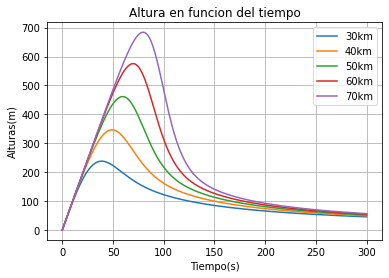

In [269]:
plt.plot(t, -y[:,1], label = '30km')
plt.plot(t, -y1[:,1], label = '40km')
plt.plot(t, -y2[:,1], label = '50km')
plt.plot(t, -y3[:,1], label = '60km')
plt.plot(t, -y4[:,1], label = '70km')
plt.title('Altura en funcion del tiempo')
plt.xlabel('Tiempo(s)')
plt.ylabel('Alturas(m)')
plt.legend()
plt.grid()

In [227]:
df=pd.DataFrame({"Altura": y_0, "Velocidad máxima":[(-y[:,1]).max(),(-y1[:,1]).max(),(-y2[:,1]).max(),(-y3[:,1]).max(),(-y4[:,1]).max()]})
df

,Altura,Velocidad máxima
0,30000,238.552281
1,40000,346.313086
2,50000,461.449165
3,60000,575.449559
4,70000,684.052368


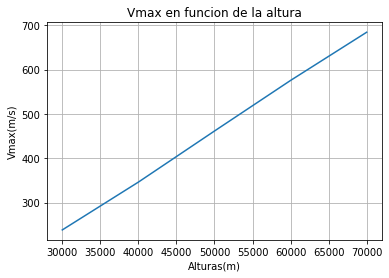

In [233]:
plt.plot(df["Altura"],df["Velocidad máxima"])
plt.title('Vmax en funcion de la altura')
plt.xlabel('Alturas(m)')
plt.ylabel('Vmax(m/s)')
plt.grid()

\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - \frac{GM}{(R+y)^2} + \frac{A\delta}{2m} \rho v^2 
\end{equation}

donde $G=6.67\times 10^{-11} \mathrm{Nm^2/kg}$, $M=5.98\times 10 ^{24} \mathrm{kg}$ y el radio de la Tierra es de $R=6.371\mathrm{km}$

In [261]:
p0=1.29 #kg/m^3
lamda=7482.2 #m

def densidad(p0,y,lamda):
    return p0*np.exp(-y/lamda)

In [262]:
p0=1.29 #kg/m^3
lamda=7482.2 #m

def densidad(p0,y,lamda):
    return p0*np.exp(-y/lamda)
densidad(p0,y,lamda)

array([[0.02340341, 1.29      ],
       [0.02340342, 1.29005036],
       [0.02340346, 1.29010072],
       ...,
       [1.45938058, 1.29782816],
       [1.4596455 , 1.29782744],
       [1.45991044, 1.29782672]])

In [263]:
def no_uniforme(y, t, params):
  m = params[0]
  G = params[1]
  M = params[2]
  R = params[3]

    
 
  dydt =  y[1]
  dvdt = -((G*M)/((R+y[0])**2)) + ((A*delt*densidad(p0,y[0],lam)*((y[1])**2)))/(2*m)
 
  return [dydt, dvdt]

In [264]:
###................................................................Condiciones iniciales
y_0 = 30000 #..................posicion inicial
v_0 = -1E-10    #velocidad inicial

y0 = np.array([y_0, v_0])  #....................................Lista de condiciones iniciales
t = np.linspace(0, 300,10000) #....................................tiempo de integracion
#odeint()

In [265]:
p0=1.29 #kg/m^3
A=0.6 #m^2
delt=0.8
m=72 # kg
M = 5.98e24 # kg
R = 6371.0e3 # m
G = 6.67e-11 #N*m^2/kg^2


params = [m,G,M,R]
y = odeint(no_uniforme, y0, t, args=(params, ) )

In [266]:
y # solucion a la ecuacion diferencial de paracaidista (versión corregida)

array([[ 3.00000000e+04, -1.00000000e-10],
       [ 2.99999956e+04, -2.92076043e-01],
       [ 2.99999825e+04, -5.84151694e-01],
       ...,
       [-9.23078033e+02, -4.52673404e+01],
       [-9.24436126e+02, -4.52631832e+01],
       [-9.25794095e+02, -4.52590269e+01]])

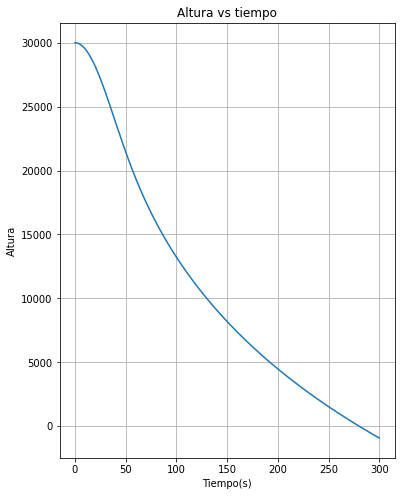

In [267]:
y_1 = np.ones(len(y[:,0]))-y[:,0] 
y_2 = -y[:,1] 

fig1 = plt.figure(figsize = (6,8))
plt.subplot()
plt.plot(t,-y_1)
plt.title('Altura vs tiempo')
plt.xlabel('Tiempo(s)')
plt.ylabel('Altura')
plt.grid()
plt.show()